# TSIA202a - Third Practice Session

The goal of this third partical work is to use an AR(p) process to model a speech signal, and show that this approch is surprisingly powerful despite its simplicity.

The proposed synthesis algorithm divides into several steps.

1. Filter the audio signal to emphasize the highest frequencies (in order to flatten the spectrum and reduce precision issues with FFT computations).
2. Split the signal into several overlapping frames and iterate over them.
    1. Detect if the frame corresponds to noise or to a voiced signal, and estimate the fundamental frequency in the later case.
    2. Estimate the AR(p) coefficients using Yule-Walker equations.
    3. Re-synthetise the frame using the AR(p) coefficients, starting from a white noise in the case of a noisy frame, or a Dirac comb in the case of a voiced frame.
3. Overlap-add the synthesized frames with a Hanning window.
4. Filter the synthesised signal to de-emphasize the highest frequencies.

We propose to implement this algorithm in two parts. First, we will derive the Yule-Walker equations, and test them on synthetic data. Then, we will code the synthesis algorithm and apply it on a real world speech signal.

# 1. Yule-Walker equations

Let us consider a causal, zero-mean, AR(p) process defined by the following recurrent equation:

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p}+Z_t
$$

where $\{Z_t , t \in \mathbb{Z}\}$ is a weak white noise with variance $\sigma^2$.

1. Show that, $\forall h \geq 1, \mathbb{E}[X_{t-h}Z_t]=0$.
2. Deduce a recurrent relation between $\gamma(h)$ and $\gamma(h-1),\gamma(h-2),\ldots,\gamma(h-p)$, for $h \geq 1$.
3. We consider separately the case $h=0$: find a new relationship between $\gamma(0)$ and $\gamma(-1),\gamma(-2),\ldots,\gamma(-p)$.
4. Put these relationships in matrix form:
   \begin{equation}
   \Gamma*{p+1}[1 \; -\phi_1 \; \ldots \; -\phi_p]^T = [\sigma^2 \; 0 \; \ldots \; 0]^T
   \end{equation}
   where $\Gamma*{p+1}$ is a suitable Toeplitz matrix that you have to determine.

# 2. Evaluation on synthetic data

We will now evaluate equation $(1)$ on a synthetically generated AR(p) process.

1. Generate n=1000 samples of an AR(4) process.
2. Estimate $\Gamma_{p+1}$ using these samples.
3. Use equation $(1)$ to estimate $\sigma^2$ and the coefficients $\phi_1,\phi_2,\ldots,\phi_p$. Compute the relative error between the estimated and the true coefficients.
4. Estimate power spectral distribution of the synthesized signal. Compare with the theoretical distribution obtained from the poles of $1/\Phi(z^{-1})$.

# 3. Speech modeling

We will now implement the synthesis algorithm and evaluate it on a speech signal.

A code template is provided below. We will use the file audio.wav to test the algorithm.

LIsten to the original and synthesized signal by using any audio player. Try to modify the pitch of the synthesised signal and listen to the result.


### 1.1)

$$\mathbb{E}[X_{t-h}Z_t] = \mathbb{E}\left[ \left(\sum_{j=0}^\infty \psi_j Z_{t-h-j} \right) Z_t \right] = \sum_{j=0}^\infty \psi_j \mathbb{E}[Z_{t-h-j} Z_t] = \sum_{j=0}^\infty \psi_j \cdot 0 = 0$$


### 1.2)

$$X_t = \sum_{k=1}^p \phi_k X_{t-k} + Z_t$$
$$X_t X_{t-h} = \left( \sum_{k=1}^p \phi_k X_{t-k} + Z_t \right) X_{t-h}$$
$$X_t X_{t-h} = \sum_{k=1}^p \phi_k X_{t-k} X_{t-h} + Z_t X_{t-h}$$
$$\mathbb{E}[X_t X_{t-h}] = \mathbb{E}\left[ \sum_{k=1}^p \phi_k X_{t-k} X_{t-h} \right] + \mathbb{E}[Z_t X_{t-h}]$$
$$\gamma(h) = \mathbb{E}[X_t X_{t-h}] = \sum_{k=1}^p \phi_k \mathbb{E}[X_{t-k} X_{t-h}] + \mathbb{E}[Z_t X_{t-h}]$$
$$\gamma(h) = \sum_{k=1}^p \phi_k \gamma(h-k) + \mathbb{E}[Z_t X_{t-h}]$$

since $h \geq 1$, we know that $\mathbb{E}[Z_t X_{t-h}] = 0$:

$$\gamma(h) = \sum_{k=1}^p \phi_k \gamma(h-k)$$


### 1.3)

For $h=0$ we have:

$$X_t = \sum_{k=1}^p \phi_k X_{t-k} + Z_t$$
$$X_t X_t = \sum_{k=1}^p \phi_k X_{t-k} X_t + Z_t X_t$$
$$\mathbb{E}[X_t^2] = \sum_{k=1}^p \phi_k \mathbb{E}[X_{t-k} X_t] + \mathbb{E}[Z_t X_t]$$
$$\gamma(0) = \sum_{k=1}^p \phi_k \gamma(-k) + \mathbb{E}[Z_t X_t]$$

for a real stationary process, $\gamma(-k) = \gamma(k)$.

$$\gamma(0) = \sum_{k=1}^p \phi_k \gamma(k) + \mathbb{E}[Z_t X_t]$$

Using:

$$\mathbb{E}[Z_t X_t] = \mathbb{E}\left[ Z_t \left( \sum_{k=1}^p \phi_k X_{t-k} + Z_t \right) \right]$$

we get:

$$\gamma(0) = \sum_{k=1}^p \phi_k \gamma(k) + \mathbb{E}\left[ Z_t \left( \sum_{k=1}^p \phi_k X_{t-k} + Z_t \right) \right]$$

$$\gamma(0) = \sum_{k=1}^p \phi_k \gamma(k) + \sum_{k=1}^p \phi_k \mathbb{E}[Z_t X_{t-k}] + \mathbb{E}[Z_t^2]$$

$$\gamma(0) = \sum_{k=1}^p \phi_k \gamma(k) + \sigma^2$$


### 1.4)

We want to combine these $p+1$ equations (the one for $h=0$ and the $p$ equations for $h=1, \ldots, p$) into a single matrix equation. Let's rewrite our results so all $\gamma$ terms are on one side:

$h=0$: $\gamma(0) - \sum_{k=1}^p \phi_k \gamma(k) = \sigma^2$

$h \geq 1$: $\gamma(h) - \sum_{k=1}^p \phi_k \gamma(h-k) = 0$

Let's write out the system for $h=0, 1, \ldots, p$:

$h=0$: $\gamma(0) - \phi_1\gamma(1) - \phi_2\gamma(2) - \ldots - \phi_p\gamma(p) = \sigma^2$

$h=1$: $\gamma(1) - \phi_1\gamma(0) - \phi_2\gamma(-1) - \ldots - \phi_p\gamma(1-p) = 0$

$h=2$: $\gamma(2) - \phi_1\gamma(1) - \phi_2\gamma(0) - \ldots - \phi_p\gamma(2-p) = 0$

$\vdots$

$h=p$: $\gamma(p) - \phi_1\gamma(p-1) - \phi_2\gamma(p-2) - \ldots - \phi_p\gamma(0) = 0$

Using the even property $\gamma(-k) = \gamma(k)$, this system is:

$\gamma(0) \cdot 1 + \gamma(1) \cdot (-\phi_1) + \ldots + \gamma(p) \cdot (-\phi_p) = \sigma^2$

$\gamma(1) \cdot 1 + \gamma(0) \cdot (-\phi_1) + \ldots + \gamma(p-1) \cdot (-\phi_p) = 0$

$\vdots$

$\gamma(p) \cdot 1 + \gamma(p-1) \cdot (-\phi_1) + \ldots + \gamma(0) \cdot (-\phi_p) = 0$

This is exactly the matrix product:

$$
\begin{pmatrix}
\gamma(0) & \gamma(1) & \gamma(2) & \cdots & \gamma(p) \\
\gamma(1) & \gamma(0) & \gamma(1) & \cdots & \gamma(p-1) \\
\gamma(2) & \gamma(1) & \gamma(0) & \cdots & \gamma(p-2) \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\gamma(p) & \gamma(p-1) & \gamma(p-2) & \cdots & \gamma(0)
\end{pmatrix}
\begin{pmatrix}
1 \\
-\phi_1 \\
-\phi_2 \\
\vdots \\
-\phi_p
\end{pmatrix}
=
\begin{pmatrix}
\sigma^2 \\
0 \\
0 \\
\vdots \\
0
\end{pmatrix}
$$

Thus, the matrix $\Gamma_{p+1}$ is the $(p+1) \times (p+1)$ symmetric Toeplitz matrix of autocovariances, where $\Gamma_{i,j} = \gamma(|i-j|)$.


In [1]:
# imports
import librosa
import soundfile as sf
import scipy
import numpy as np
import math
from collections import defaultdict
from tqdm import tqdm
import matplotlib.animation
import matplotlib.pyplot as plt
from IPython.display import HTML

### 1. Yule-Walker equations


In [2]:
T = 22000
p = 4
# AR(4)
phi_true = np.array([0.75, -0.1, 0.08, -0.05], dtype=float)
sigma2_true = 1.0

# AR(p) ：X_t = \sum phi_k X_{t-k} + Z_t
X = np.zeros(T + 5 * p, dtype=float)
Z_full = np.random.normal(0.0, np.sqrt(sigma2_true), size=T + 5 * p)
for t in range(p, T + 5 * p):
    X[t] = np.dot(phi_true, X[t - p: t][::-1]) + Z_full[t]
X = X[5 * p:]
Z = Z_full[5 * p:]
X = X - X.mean()

# (1) check E[X_{t-h} Z_t] ≈ 0, h>=1（Approximate using sample covariance）
Hmax = 8
cov_xz = []
for h in range(1, Hmax+1):
    X_shifted = X[:-h]
    Z_aligned = Z[h:]
    cov = np.mean(X_shifted*Z_aligned)
    cov_xz.append(cov)

print("[P1-1] sample E[X_{t-h} Z_t] (h=1..8):", np.round(cov_xz, 4))

# (2) Verify recursion using sample autocovariance: γ(h) ≈ sum_{k=1}^p φ_k γ(h-k)
corr_full = np.correlate(X, X, mode="full")
gamma_hat = corr_full[len(X) - 1: len(X) - 1 +
                      (Hmax + p + 1)] / len(X)  # γ(0..Hmax+p)
chk = []
for h in range(1, Hmax+1):
    lags = np.arange(h-1, h-p-1, -1)
    gamma_vec = gamma_hat[np.abs(lags)]

    sum_rhs = np.dot(phi_true, gamma_vec)

    diff = gamma_hat[h] - sum_rhs
    chk.append(diff)


print("[P1-2] γ(h) - sum φ_k γ(h-k) (h=1..8):", np.round(chk, 6))

# (3) h=0 case：γ(0) ≈ sum φ_k γ(k) + σ^2
lhs = gamma_hat[0]
rhs = np.dot(phi_true, gamma_hat[1:p+1]) + sigma2_true
print(
    "[P1-3] γ(0) vs sum φ_k γ(k) + σ^2:",
    float(lhs),
    float(rhs),
    "diff=",
    float(lhs - rhs),
)

# (4) Γ_{p+1} [1, -φ]^T = [σ^2, 0,...,0]^T
Gamma_p1 = scipy.linalg.toeplitz(gamma_hat[: p + 1])  # Toeplitz(γ(0..p))
c_vec = np.zeros(p + 1)
c_vec[0] = 1.0
c_vec[1:] = -phi_true
prod = Gamma_p1 @ c_vec
target = np.zeros(p+1)
target[0] = sigma2_true
print("[P1-4] ||Γ_{p+1} c - target|| =",
      float(scipy.linalg.norm(prod - target)))

[P1-1] sample E[X_{t-h} Z_t] (h=1..8): [-0.001  -0.0068  0.0046  0.0051  0.011   0.0084  0.0136  0.0043]
[P1-2] γ(h) - sum φ_k γ(h-k) (h=1..8): [-0.000991 -0.006797  0.004623  0.005015  0.011003  0.008437  0.013562
  0.004228]
[P1-3] γ(0) vs sum φ_k γ(k) + σ^2: 1.9955224628851556 1.9875393384021562 diff= 0.007983124482999315
[P1-4] ||Γ_{p+1} c - target|| = 0.012547498275453412


### 2. Evaluation on synthetic data


[P2] φ_true=[ 0.75 -0.1   0.08 -0.05], φ_est=[ 0.7421 -0.0916  0.0375 -0.0205], rel.err=6.96%,  σ²_est≈0.9703


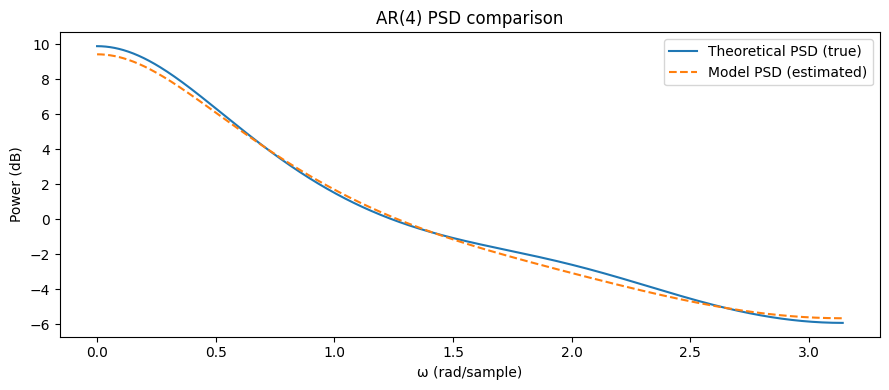

In [4]:
np.random.seed(1)
n = 1000
# Generate AR(4) samples
Xn = np.zeros(n + 5*p)
Zn = np.random.normal(0.0, np.sqrt(sigma2_true), size=n + 5*p)
for t in range(p, n + 5*p):
    Xn[t] = np.dot(phi_true, Xn[t-p:t][::-1]) + Zn[t]
Xn = Xn[5*p:]
Xn = Xn - Xn.mean()

# estimate Γ_{p+1}
corr_full_n = np.correlate(Xn, Xn, mode='full')
gamma_b = corr_full_n[len(Xn) - 1: len(Xn) - 1 + p + 1] / n

Gamma_hat = scipy.linalg.toeplitz(gamma_b)

v = np.zeros(p+1)
v[0] = 1.0

'''
Given Γ_{p+1} c = [σ^2,0,...,0]^T，solve c=Γ^{-1} v.
Since σ^2=1/c0，coef = c*σ^2
'''
c = np.linalg.solve(Gamma_hat, v)
# (Hint: use scipy.linalg.solve())

sigma2_est = 1.0 / c[0]
coef = c * sigma2_est
coef[0] = 1.0
phi_est = -coef[1:]

rel_err = scipy.linalg.norm(phi_est - phi_true) / scipy.linalg.norm(phi_true)
print(
    f"[P2] φ_true={phi_true}, φ_est={np.round(phi_est, 4)}, rel.err={rel_err:.2%},  σ²_est≈{sigma2_est:.4f}")

# PSD compare（Theo vs Samples)
# Theo：S(ω) = σ² / |1 - sum φ_k e^{-i ω k}|²
w = np.linspace(0, np.pi, 1024)
w1, H_true = scipy.signal.freqz([1.0], np.r_[1.0, -phi_true], worN=w)
S_theo = sigma2_true * (np.abs(H_true)**2)
w2, H_est = scipy.signal.freqz([1.0], coef, worN=w)
S_est_model = sigma2_est * (np.abs(H_est)**2)

win = np.hanning(n)
Xw = Xn * win
Dw = np.fft.rfft(Xw, n=2*n)
S_emp = (np.abs(Dw)**2) / (len(Xw))  # periodogram

plt.figure(figsize=(9, 4))
plt.plot(w, 10*np.log10(S_theo+1e-12), label="Theoretical PSD (true)")
plt.plot(w, 10*np.log10(S_est_model+1e-12),
         '--', label="Model PSD (estimated)")
plt.xlabel("ω (rad/sample)")
plt.ylabel("Power (dB)")
plt.title("AR(4) PSD comparison")
plt.legend()
plt.tight_layout()
plt.show()

### 3. Speech modeling


In [5]:
"""
The hyperparameters
"""
sampling_rate = 8000  # (Hz)
frame_duration = 0.04  # duration of the analysis frames (seconds)
overlap_ratio = 0.5  # overlap ratio between two consecutive analysis frames
p = 12  # AR(p) model order
f_min = 80  # minimum frequency for pitch detection (Hz)
f_max = 400  # maximum frequency for pitch detection Hz)
pitch_detection_threshold = 0.5  # threshold for pitch detection

In [7]:
# synthesis
# load audio
x = librosa.load("phrasezoe8k.wav", sr=sampling_rate)[0]

# pre-emphasis filtering
x = scipy.signal.lfilter([1, -0.98], [1], x)

# handy variables
n_frame = (
    math.floor(len(x) / (sampling_rate *
               frame_duration * (1 - overlap_ratio))) - 1
)  # discard last frame
frame_length = int(sampling_rate * frame_duration)
min_period = math.floor(sampling_rate / f_max)
max_period = math.ceil(sampling_rate / f_min)
synthesis = np.zeros(len(x))
log_dict = defaultdict(list)

# loop over frames
for frame_index in tqdm(range(n_frame)):
    # extract frame
    start = int(frame_index * sampling_rate *
                frame_duration * (1 - overlap_ratio))
    end = start+frame_length
    frame = x[start:end]

    # detect pitch
    auto_covariance = np.fft.irfft(
        np.abs(np.fft.rfft(frame - np.mean(frame), (2 * frame_length - 1))) ** 2
        / frame_length
    )[:frame_length]
    peak_index = np.argmax(auto_covariance[min_period:])
    pitch = peak_index + min_period
    max_value = auto_covariance[min_period:].max()/auto_covariance[0]

    if pitch > max_period or max_value < pitch_detection_threshold:
        pitch = 0

    # estimate AR(p) coefficients
    gamma = scipy.linalg.toeplitz(auto_covariance[:p+1])
    # The input should be the first (p+1) values of 'auto_covariance'.
    v = np.array([1 if k == 0 else 0 for k in range(p + 1)])
    coefficient = scipy.linalg.solve(gamma, v)
    sigma = 1/coefficient[0]
    coefficient = coefficient * sigma

    # re-synthetise frame
    if pitch == 0:
        noise = np.random.normal(0.0, 1.0, frame_length + p)
        frame_r = scipy.signal.lfilter([1], coefficient, noise)
    else:
        dirac_comb = np.zeros(frame_length + p)
        dirac_comb[p::pitch] = 1.0
        frame_r = scipy.signal.lfilter([1], coefficient, dirac_comb)
    frame_r = frame_r[p:]
    normalization_factor = np.sqrt(sigma / np.var(frame_r))
    frame_r = normalization_factor * frame_r[:frame_length]

    # overlap-add
    synthesis[start:end] += frame_r * np.hanning(frame_length)
    # 1. Multiply the synthesized 'frame_r' by a Hanning window (np.hanning(frame_length)).
    # 2. Add the result to the main 'synthesis' buffer at the 'start:end' position.

    # compute power spectral density (for logging purposes)
    original_psd = (
        np.abs(np.fft.rfft(frame * np.hanning(frame_length))) ** 2
    ) / frame_length
    synthesis_psd = (
        np.abs(np.fft.rfft(frame_r * np.hanning(frame_length))) ** 2
    ) / frame_length

    # log
    log_dict["frame"].append(frame)
    log_dict["pitch"].append(pitch)
    log_dict["sigma"].append(sigma)
    log_dict["coefficient"].append(coefficient)
    log_dict["frame_r"].append(frame_r)
    log_dict["original_psd"].append(original_psd)
    log_dict["synthesis_psd"].append(synthesis_psd)

# de-emphasis filtering
synthesis = scipy.signal.lfilter([1], [1, -0.98], synthesis)

# log
sf.write("synthesis.wav", synthesis, sampling_rate)
log_dict["synthesis"].append(synthesis)
log_dict = {k: np.array(v) for k, v in log_dict.items()}

100%|██████████| 279/279 [00:00<00:00, 1242.14it/s]


In [ ]:
# plot
# time axis for plotting
sample_time = np.linspace(0, len(x) / sampling_rate, len(x))
frame_time = np.linspace(0, n_frame * frame_duration *
                         (1 - overlap_ratio), n_frame)

# waveform
plt.figure(figsize=(8, 2))
plt.title("waveform")
plt.plot(sample_time, x)
plt.show()

# pitch
plt.figure(figsize=(8, 2))
plt.title("pitch")
plt.plot(frame_time, log_dict["pitch"])
plt.show()

# variance
plt.figure(figsize=(8, 2))
plt.title("sigma")
plt.plot(frame_time, log_dict["sigma"])
plt.show()

# power spectral density
fig, ax = plt.subplots()
fig.suptitle("estimated & theoretical spectral density")
y_min = min(log_dict["original_psd"].min(), log_dict["synthesis_psd"].min())
y_max = max(log_dict["original_psd"].max(), log_dict["synthesis_psd"].max())


def animate(i):
    ax.cla()
    ax.set_ylim([y_min - 0.1, y_max + 0.1])
    ax.plot(log_dict["original_psd"][i], label="original_psd")
    ax.plot(log_dict["synthesis_psd"][i], label="synthesis_psd")


animation = matplotlib.animation.FuncAnimation(
    fig, animate, frames=len(log_dict["original_psd"])
)
display(HTML(animation.to_jshtml()))
plt.close()